# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance # euclidean distance
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(color_codes=True)

In [3]:
def display_all(df):
    """ To display more columns than default
    """
    
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

# Data Import

In [4]:
path = "D:/case studies/syngenta_crop_challenge/Crop Challenge Data_2/Dataset/"

env_performance = pd.read_csv(path+"environment_performance.csv")

In [5]:
display_all(env_performance.tail().T)

,1555,1556,1557,1558,1559
ENV_ID,Env_995,Env_996,Env_997,Env_998,Env_999
ENV_YIELD_MEAN,140.422,134.881,159.17,157.384,149.32
tavg,20.9,19.125,18.7658,20.0288,20.7767
TMAX,29.1167,26.0151,25.7437,26.8526,27.8367
TMIN,12.6833,12.2349,11.788,13.2051,13.7167
warmnights,8,5,0,2,5
hotdays,23,16,2,3,9
VP,232640,249920,232320,248600,245640
ELEVATION,2160.17,2203.33,2210.19,2205.09,2160.76
dayl_srad_tavg,62456711286,59015515547,54471663593,56619637935,57170418669


## Data preprocessing

In [6]:
# Data preparation

env_y = env_performance[['ENV_ID','ENV_YIELD_MEAN']]
env_x = env_performance.drop(['ENV_ID','ENV_YIELD_MEAN'], axis = 1)

# preprocessing
robust_scaler = RobustScaler()
env_x_scaled = pd.DataFrame(robust_scaler.fit(env_x).transform(env_x))
env_x_scaled.columns = env_x.columns
env_x_scaled.head(1)

,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,max.soil.temp,min.soil.temp,...,om.soil.temp,hotdays:SILT,prec_vp:TMAX,max.soil.temp:water.availability,max.soil.temp:IRRIGATION,hotdays:prec_vp,TMAX:IRRIGATION,IRRIGATION:hotdays,max.soil.temp:SILT,LAT:water.availability
0,-1.48967,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.16796,-1.030405,-1.565517,-1.348011,...,-1.321167,0.0,-0.644262,0.074191,-1.013472,0.0,-0.839657,0.0,-1.350609,0.600997


## Heat Stress

### K-means Clustering

In [7]:
# Clustering data into 2 groups with Heat Metrics - predicting labels 

train = env_x_scaled[['tavg','TMAX','TMIN','warmnights','hotdays','VP','ELEVATION', 'dayl_srad_tavg', 'max.soil.temp',
                      'min.soil.temp','mean.soil.temp', 'clay.soil.temp','hotdays:max.soil.temp','max.soil.temp:TMAX'
                     ]]

m = KMeans(n_clusters=2)

m.fit(train)
#predict

labels = m.predict(train)
labels = pd.DataFrame(labels)
labels.columns=['labels_heat']
env_stresses = pd.concat([env_y,env_x_scaled,labels], axis=1)
env_stresses.head(1)

,ENV_ID,ENV_YIELD_MEAN,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,...,hotdays:SILT,prec_vp:TMAX,max.soil.temp:water.availability,max.soil.temp:IRRIGATION,hotdays:prec_vp,TMAX:IRRIGATION,IRRIGATION:hotdays,max.soil.temp:SILT,LAT:water.availability,labels_heat
0,Env_1,101.42998,-1.48967,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.16796,-1.030405,...,0.0,-0.644262,0.074191,-1.013472,0.0,-0.839657,0.0,-1.350609,0.600997,0


### Validate clusters

One cluster should represent high stresses affecting environment and other low stress affecting environment.
We use Yield as a surrogate for stress, Yield of a crop reduces with increase in stress

In [8]:
# Validating clusters
env_stresses.groupby('labels_heat').agg({'ENV_YIELD_MEAN': ['max', 'min', 'mean','std','count']})

ENV_YIELD_MEAN                                        
                       max        min        mean        std count
labels_heat                                                       
0               181.664953  46.536916  118.553427  18.967079  1261
1               177.316497  28.077529  107.539117  31.945299   299

cluster 1 has lower mean Yield

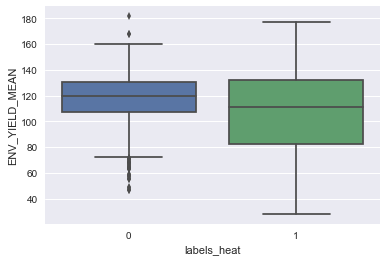

In [9]:
# Validating clusters
sns.boxplot(x='labels_heat', y='ENV_YIELD_MEAN', data=env_stresses)

There is lot of overlap of yield between the 2 clusters, ideally lesser the overlap lesser better the segmentation

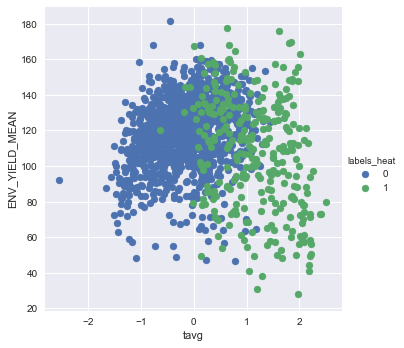

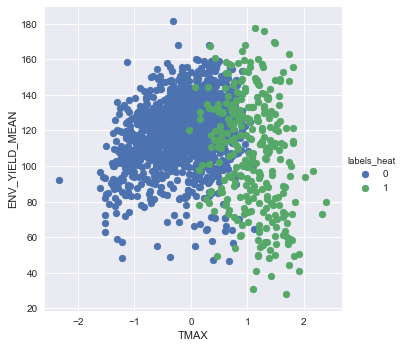

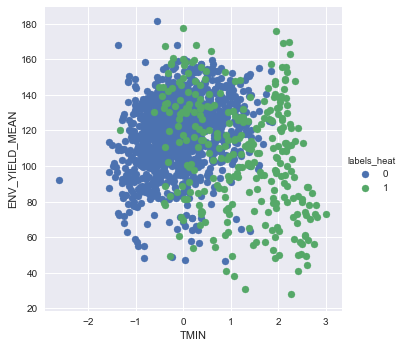

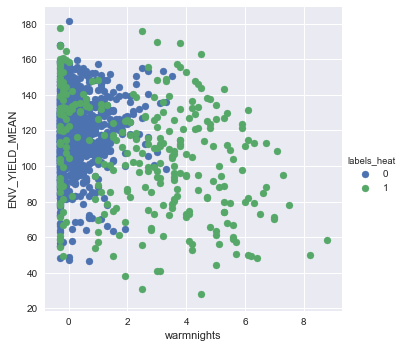

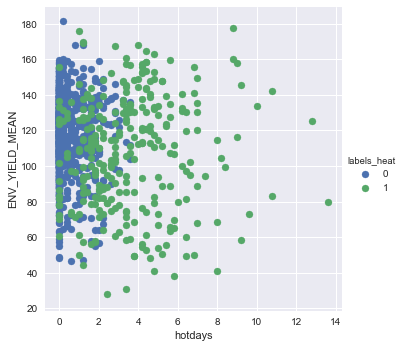

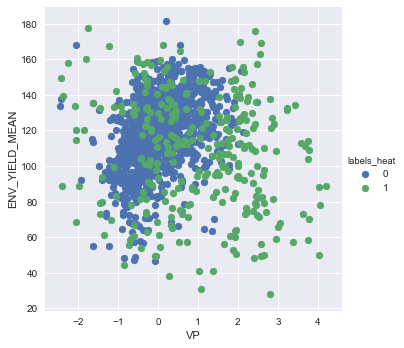

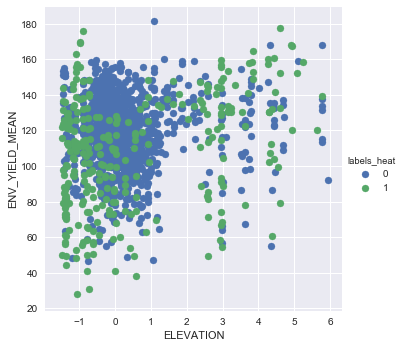

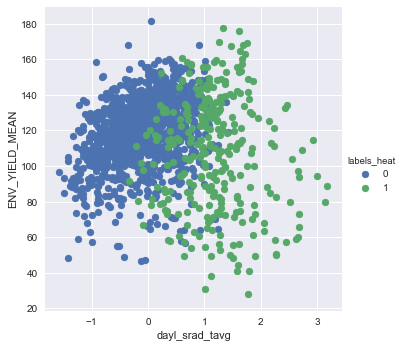

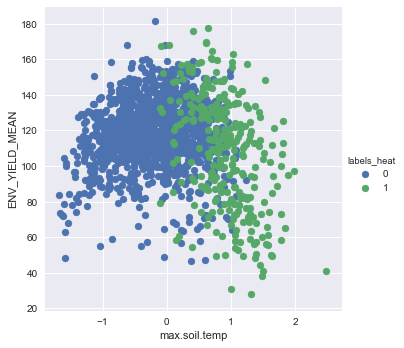

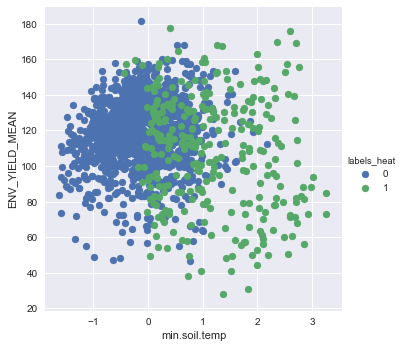

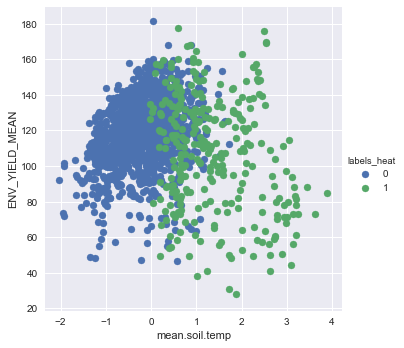

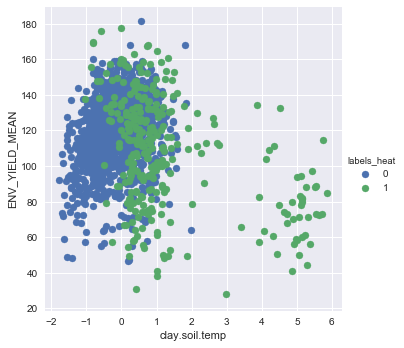

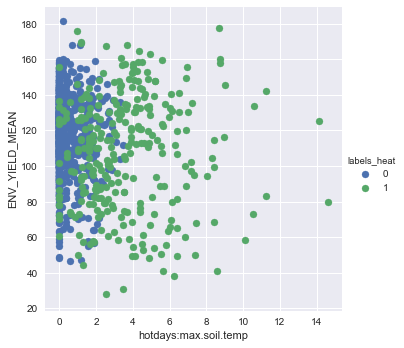

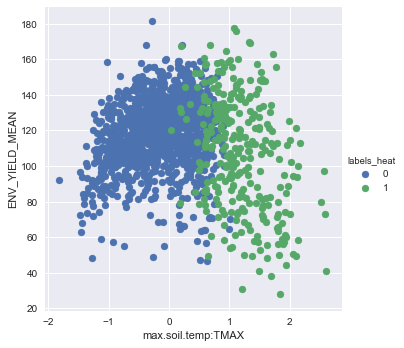

In [10]:
# Validating clusters with each feature - shows 2 clusters having low stress and high stres
# cluster 1 is higher stress

# scatter plot of Yield with variable, shows cluster 1 is on right side and more prone to stress
for z in range(2,env_stresses.loc[:,"ENV_ID":"max.soil.temp:TMAX"].shape[1]):
    sns.FacetGrid(env_stresses, hue="labels_heat", size=5) \
       .map(plt.scatter, env_stresses.columns[z], 'ENV_YIELD_MEAN') \
       .add_legend()
    plt.show()

K-means is able to segment the independent variables properly with very less overlap, 
here the features we have taken are such that stresses increases with them
,hence, we consider cluster 1 as higher stress affecting

### Creating Stress metric by euclidean distance

In [11]:
# finding extreme points - lowest stress and highest stress

# max distance from the centroid
dist = [ np.linalg.norm(x-y) for x, y in zip(train.values, np.array(m.cluster_centers_))]

extreme_1 = train.values[dist.index(max(dist))]

# max distance from the first extreme
dist1 = [np.linalg.norm(x-y) for x, y in zip(train.values, extreme_1)]

extreme_2 = train.values[dist1.index(max(dist1))]

extreme_points = np.array([extreme_1,extreme_2])
extreme_points

array([[-1.04072144, -1.11552404, -0.82736829, -0.3       ,  0.        ,
        -0.37033825,  0.87999697, -0.8071578 , -0.76551724, -0.00994318,
        -0.69906433, -0.79616748,  0.        , -0.9883939 ],
       [ 0.98824148,  1.39759938,  0.43000654, -0.1       ,  8.        ,
        -2.03816132,  2.95879645,  1.67141254,  1.27586207,  0.296875  ,
         0.74329588,  0.4507826 ,  8.39680888,  1.58439342]])

In [12]:
# extreme points distance from centres
centers = m.cluster_centers_
distance.euclidean(extreme_points[0], centers[0]), distance.euclidean(extreme_points[0], centers[1]), distance.euclidean(extreme_points[1], centers[0]), distance.euclidean(extreme_points[1], centers[1])

(2.2563229194505214, 8.36328694883397, 12.335807202824238, 8.278204095454837)

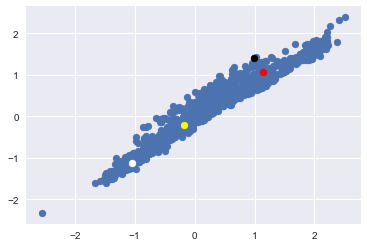

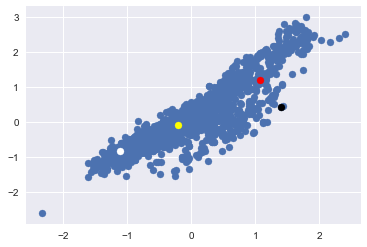

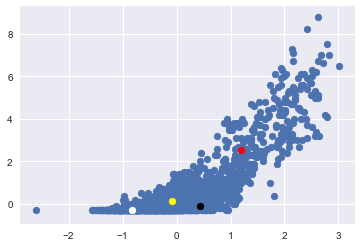

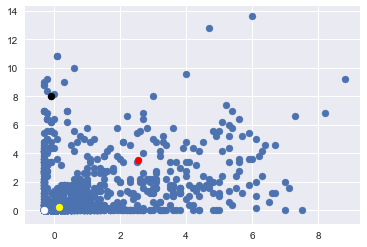

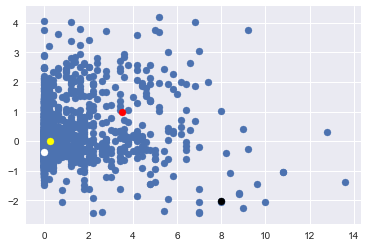

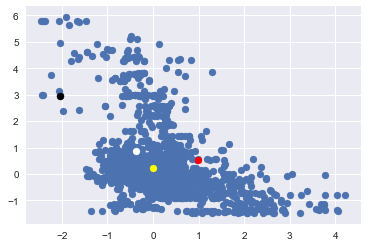

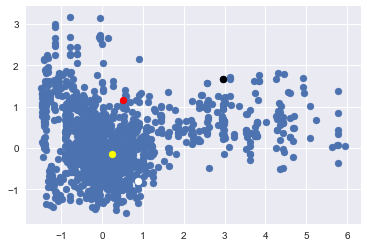

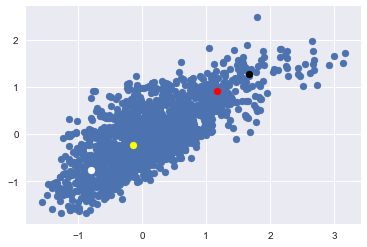

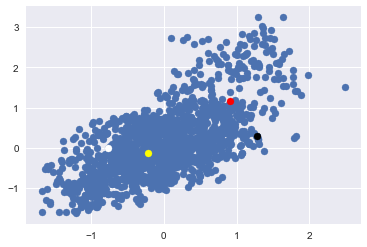

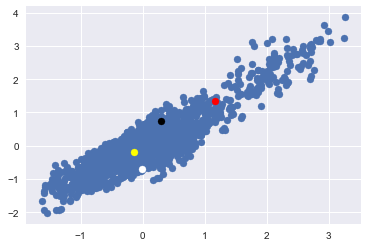

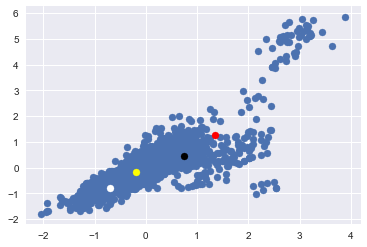

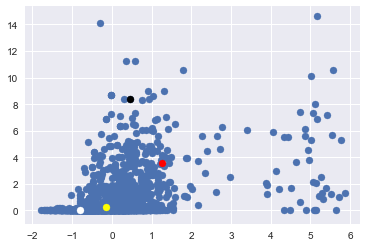

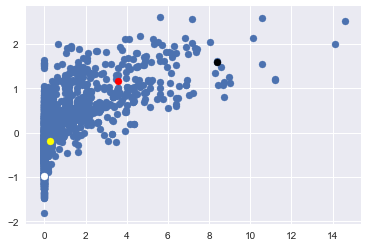

In [13]:
# scatter plot with centres and extreme points 
# extreme 1 is lowest stress point
# extreme 2 is highest stress point

for z in range(0,train.shape[1]-1):
    plt.scatter(train.values[:,z],train.values[:,z+1])
    #for a plot on top of scatter plot
    plt.scatter(extreme_1[z] ,extreme_1[z+1], color='white')
    plt.scatter(extreme_2[z] ,extreme_2[z+1], color='black')
    plt.scatter(centers[0][z] ,centers[0][z+1], color='yellow')
    plt.scatter(centers[1][z] ,centers[1][z+1], color='red')
    plt.show()

In [14]:
# scaling stress from both extreme points

# euclidean distance for each pbs with both 
for i in range(0, env_stresses.shape[0]):
    env_stresses.loc[i,'dist_from_min_heat_stress'] = distance.euclidean(train.values[i],extreme_points[0])
    env_stresses.loc[i,'dist_from_max_heat_stress']= distance.euclidean(train.values[i],extreme_points[1])
    
env_stresses['heat_stress_percent'] = env_stresses['dist_from_min_heat_stress']/(env_stresses['dist_from_max_heat_stress']+env_stresses['dist_from_max_heat_stress'])

In [15]:
# Heat Stress 
env_stresses['heat_stress'] = env_stresses['heat_stress_percent']*env_stresses['ENV_YIELD_MEAN']
env_stresses.head(5)

,ENV_ID,ENV_YIELD_MEAN,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,...,hotdays:prec_vp,TMAX:IRRIGATION,IRRIGATION:hotdays,max.soil.temp:SILT,LAT:water.availability,labels_heat,dist_from_min_heat_stress,dist_from_max_heat_stress,heat_stress_percent,heat_stress
0,Env_1,101.429980,-1.489670,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.167960,-1.030405,...,0.000000,-0.839657,0.0,-1.350609,0.600997,0,2.655422,14.193160,0.093546,9.488353
1,Env_10,101.501334,-1.040721,-1.115524,-0.827368,-0.3,0.0,-0.370338,0.879997,-0.807158,...,0.000000,-0.683025,0.0,-0.095545,1.560475,0,0.000000,13.203110,0.000000,0.000000
2,Env_100,110.765224,-0.605769,-0.570125,-0.566422,-0.3,0.0,-0.823070,0.002190,-0.907785,...,0.000000,-0.386136,0.0,-0.478613,1.755213,0,1.593002,13.212119,0.060286,6.677554
3,Env_1000,129.809379,0.328534,0.546163,0.065497,-0.3,3.2,0.004337,2.956280,0.673974,...,3.867769,26.473102,20.0,0.071503,0.175837,1,6.154697,7.697047,0.399809,51.898953
4,Env_1001,125.598805,-0.560009,-0.351314,-0.747515,-0.3,1.6,0.205551,2.956113,0.483231,...,2.272727,21.587672,10.0,-0.052312,0.381607,0,3.755337,10.393585,0.180656,22.690241


## We perform the same methodology used in Heat for Drought and Heat-Drought Stresses

# Drought

In [16]:
# drought affecting variables

train = env_x_scaled[['water.availability','Soil_IRR','PREC', 
             'PREC_IRR','IRRIGATION','prec_vp:IRRIGATION', 'SILT:IRRIGATION']]

m = KMeans(n_clusters=2)

m.fit(train)

#predict

labels = m.predict(train)
labels = pd.DataFrame(labels)
labels.columns=['labels_drought']
env_stresses = pd.concat([env_stresses,labels], axis=1)
env_stresses.head(1)


,ENV_ID,ENV_YIELD_MEAN,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,...,TMAX:IRRIGATION,IRRIGATION:hotdays,max.soil.temp:SILT,LAT:water.availability,labels_heat,dist_from_min_heat_stress,dist_from_max_heat_stress,heat_stress_percent,heat_stress,labels_drought
0,Env_1,101.42998,-1.48967,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.16796,-1.030405,...,-0.839657,0.0,-1.350609,0.600997,0,2.655422,14.19316,0.093546,9.488353,1


In [17]:
# Validating clusters
env_stresses.groupby('labels_drought').agg({'ENV_YIELD_MEAN': ['max', 'min', 'mean','std','count']})

ENV_YIELD_MEAN                                        
                          max        min        mean        std count
labels_drought                                                       
0                  181.664953  58.994991  128.521745  19.924473   306
1                  169.478717  28.077529  113.494747  22.065907  1254

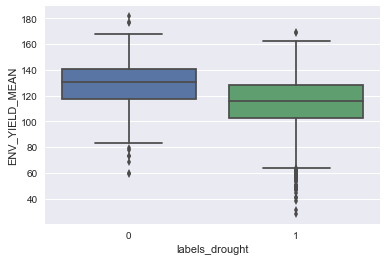

In [18]:
# Validating clusters
sns.boxplot(x='labels_drought', y='ENV_YIELD_MEAN', data=env_stresses)

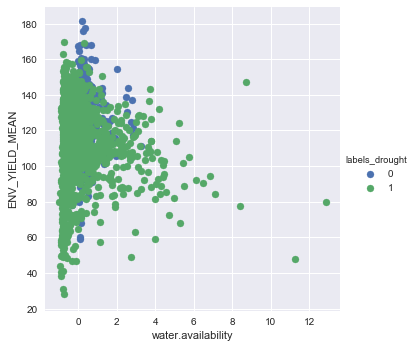

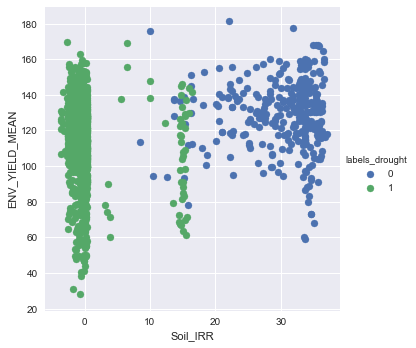

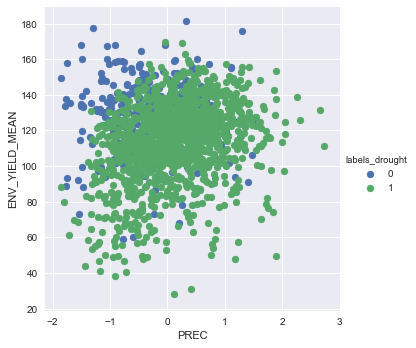

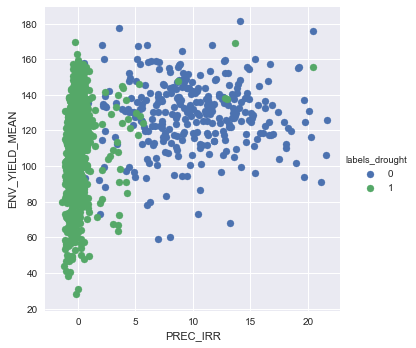

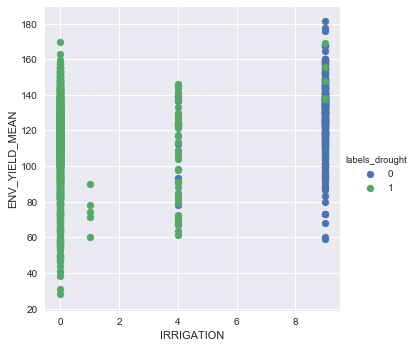

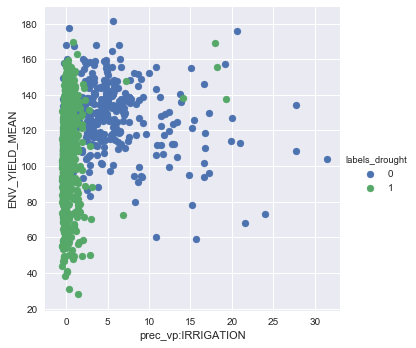

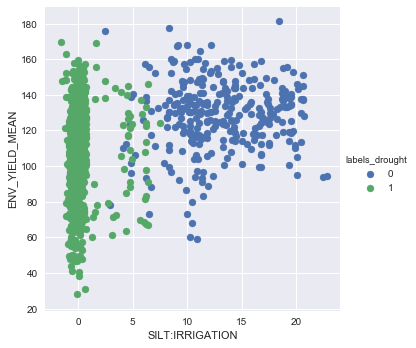

In [19]:
# Validating clusters with each feature - shows 2 clusters having low stress and high stres
# cluster 0 is higher stress

# scatter plot of Yield with variable, shows cluster 1 is on right side and more prone to stress
for z in range(env_stresses.columns.get_loc("water.availability"),env_stresses.columns.get_loc("SILT:IRRIGATION")+1):
    sns.FacetGrid(env_stresses, hue="labels_drought", size=5) \
       .map(plt.scatter, env_stresses.columns[z], 'ENV_YIELD_MEAN') \
       .add_legend()
    plt.show()

In [20]:
# finding extreme points - lowest stress and highest stress

# max distance from the centroid
dist = [ np.linalg.norm(x-y) for x, y in zip(train.values, np.array(m.cluster_centers_))]

extreme_1 = train.values[dist.index(max(dist))]

# max distance from the first extreme
dist1 = [np.linalg.norm(x-y) for x, y in zip(train.values, extreme_1)]

extreme_2 = train.values[dist1.index(max(dist1))]

extreme_points = np.array([extreme_1,extreme_2])
extreme_points

array([[ 0.30226547, -0.05280708,  0.08928571, -0.20639535,  0.        ,
        -0.35617716, -1.05688073],
       [ 0.24509655, 34.21906519,  1.10714286, 19.18895349,  9.        ,
         6.62191142, 13.98899083]])

In [21]:
# extreme points distance from centres
centers = m.cluster_centers_
distance.euclidean(extreme_points[0], centers[0]), distance.euclidean(extreme_points[0], centers[1]), distance.euclidean(extreme_points[1], centers[0]), distance.euclidean(extreme_points[1], centers[1])

(36.39534279179379, 1.2365514677968594, 10.352288872739162, 43.035643390837066)

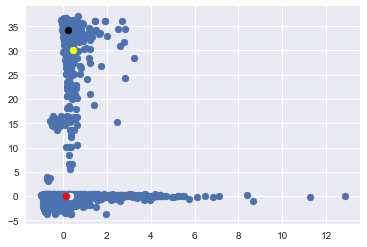

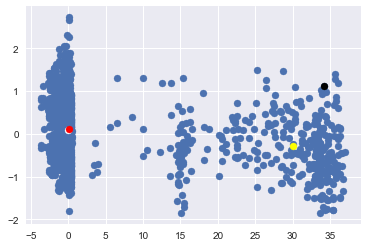

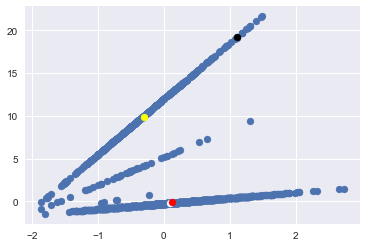

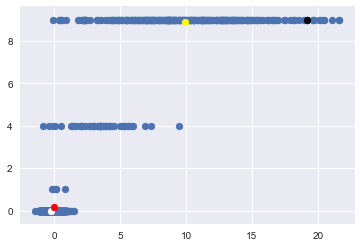

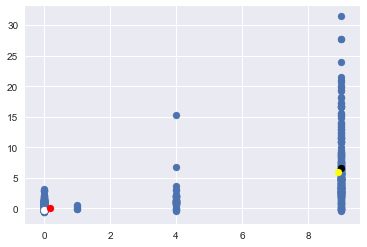

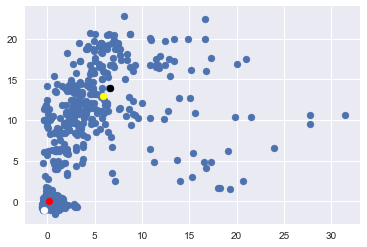

In [22]:
# scatter plot with centres and extreme points 
# extreme 1 is highest stress point
# extreme 2 is lowest stress point

for z in range(0,train.shape[1]-1):
    plt.scatter(train.values[:,z],train.values[:,z+1])
    #for a plot on top of scatter plot
    plt.scatter(extreme_1[z] ,extreme_1[z+1], color='white')
    plt.scatter(extreme_2[z] ,extreme_2[z+1], color='black')
    plt.scatter(centers[0][z] ,centers[0][z+1], color='yellow')
    plt.scatter(centers[1][z] ,centers[1][z+1], color='red')
    plt.show()

In [23]:
# scaling stress from both extreme points

# euclidean distance for each pbs with both 
for i in range(0, env_stresses.shape[0]):
    env_stresses.loc[i,'dist_from_max_drought_stress'] = distance.euclidean(train.values[i],extreme_points[0])
    env_stresses.loc[i,'dist_from_min_drought_stress']= distance.euclidean(train.values[i],extreme_points[1])
    

In [24]:
# Heat Stress 
env_stresses['drought_stress_percent'] = env_stresses['dist_from_min_drought_stress']/(env_stresses['dist_from_min_drought_stress']+env_stresses['dist_from_max_drought_stress'])

env_stresses['drought_stress'] = env_stresses['drought_stress_percent']*env_stresses['ENV_YIELD_MEAN']
env_stresses.head(5)

,ENV_ID,ENV_YIELD_MEAN,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,...,labels_heat,dist_from_min_heat_stress,dist_from_max_heat_stress,heat_stress_percent,heat_stress,labels_drought,dist_from_max_drought_stress,dist_from_min_drought_stress,drought_stress_percent,drought_stress
0,Env_1,101.429980,-1.489670,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.167960,-1.030405,...,0,2.655422,14.193160,0.093546,9.488353,1,0.000000,43.678966,1.000000,101.429980
1,Env_10,101.501334,-1.040721,-1.115524,-0.827368,-0.3,0.0,-0.370338,0.879997,-0.807158,...,0,0.000000,13.203110,0.000000,0.000000,1,1.765254,43.077433,0.960635,97.505686
2,Env_100,110.765224,-0.605769,-0.570125,-0.566422,-0.3,0.0,-0.823070,0.002190,-0.907785,...,0,1.593002,13.212119,0.060286,6.677554,1,1.644136,43.150053,0.963296,106.699673
3,Env_1000,129.809379,0.328534,0.546163,0.065497,-0.3,3.2,0.004337,2.956280,0.673974,...,1,6.154697,7.697047,0.399809,51.898953,0,40.312840,6.091429,0.131269,17.039912
4,Env_1001,125.598805,-0.560009,-0.351314,-0.747515,-0.3,1.6,0.205551,2.956113,0.483231,...,0,3.755337,10.393585,0.180656,22.690241,0,41.339483,4.446080,0.097107,12.196471


# Heat and Drought

In [25]:
# heat and drought affecting variables

train = env_x_scaled[[ 'om.soil.temp', 'hotdays:SILT', 'prec_vp:TMAX',
       'max.soil.temp:water.availability', 'max.soil.temp:IRRIGATION',
       'hotdays:prec_vp', 'TMAX:IRRIGATION', 
       'IRRIGATION:hotdays', 'max.soil.temp:SILT', 
       'LAT:water.availability']]

m = KMeans(n_clusters=2)

m.fit(train)

#predict

labels = m.predict(train)
labels = pd.DataFrame(labels)
labels.columns=['labels_heat_drought']
env_stresses = pd.concat([env_stresses,labels], axis=1)
env_stresses.head(1)


,ENV_ID,ENV_YIELD_MEAN,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,...,dist_from_min_heat_stress,dist_from_max_heat_stress,heat_stress_percent,heat_stress,labels_drought,dist_from_max_drought_stress,dist_from_min_drought_stress,drought_stress_percent,drought_stress,labels_heat_drought
0,Env_1,101.42998,-1.48967,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.16796,-1.030405,...,2.655422,14.19316,0.093546,9.488353,1,0.0,43.678966,1.0,101.42998,0


In [26]:
# Validating clusters
env_stresses.groupby('labels_heat_drought').agg({'ENV_YIELD_MEAN': ['max', 'min', 'mean','std','count']})

ENV_YIELD_MEAN                                        
                               max        min        mean        std count
labels_heat_drought                                                       
0                       169.478717  28.077529  113.555416  21.834200  1247
1                       181.664953  58.994991  127.943972  21.251565   313

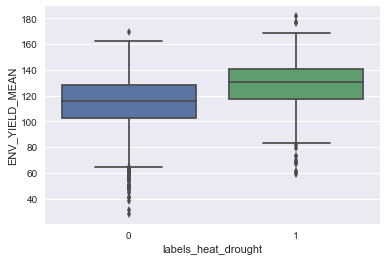

In [27]:
# Validating clusters
sns.boxplot(x='labels_heat_drought', y='ENV_YIELD_MEAN', data=env_stresses)

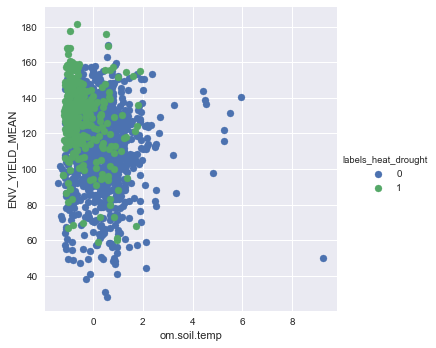

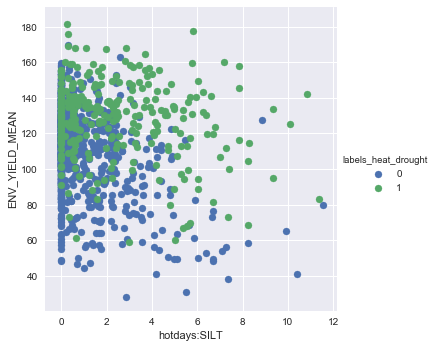

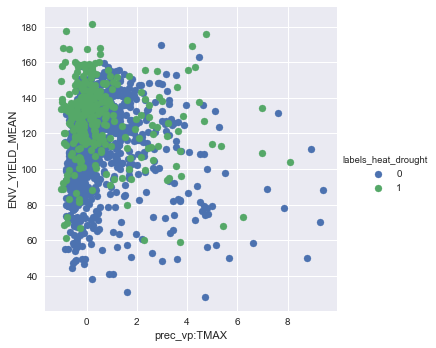

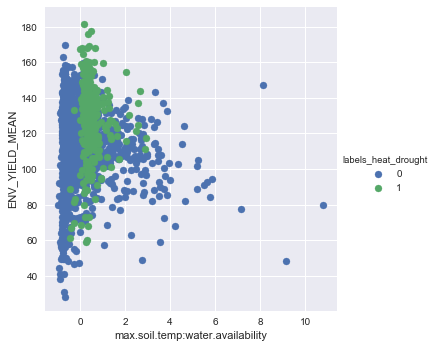

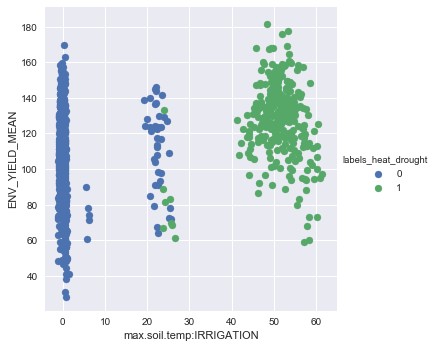

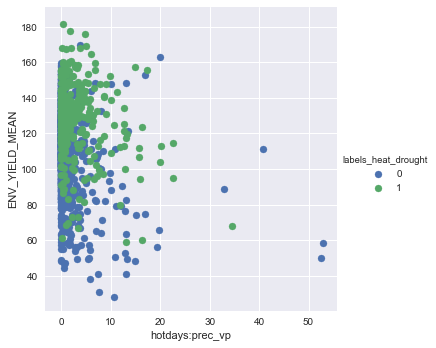

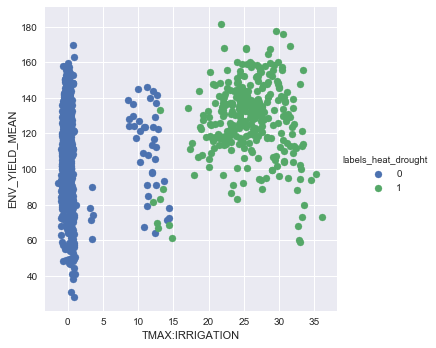

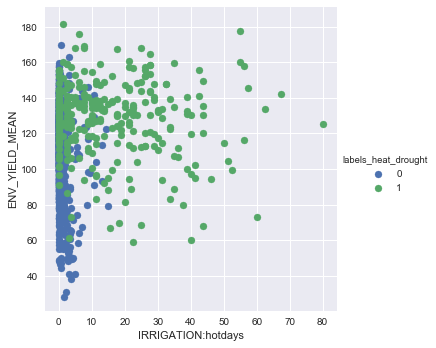

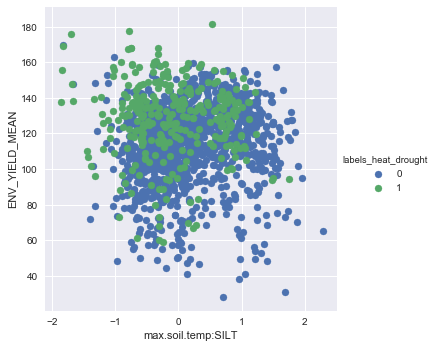

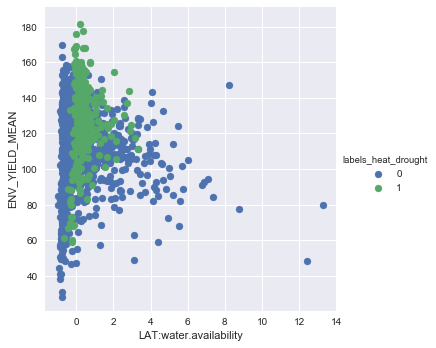

In [28]:
# Validating clusters with each feature - shows 2 clusters having low stress and high stres
# cluster 0 is higher stress

# scatter plot of Yield with variable, shows cluster 1 is on right side and more prone to stress
for z in range(env_stresses.columns.get_loc("om.soil.temp"),env_stresses.columns.get_loc("LAT:water.availability")+1):
    sns.FacetGrid(env_stresses, hue="labels_heat_drought", size=5) \
       .map(plt.scatter, env_stresses.columns[z], 'ENV_YIELD_MEAN') \
       .add_legend()
    plt.show()

In [29]:
# finding extreme points - lowest stress and highest stress

# max distance from the centroid
dist = [ np.linalg.norm(x-y) for x, y in zip(train.values, np.array(m.cluster_centers_))]

extreme_1 = train.values[dist.index(max(dist))]

# max distance from the first extreme
dist1 = [np.linalg.norm(x-y) for x, y in zip(train.values, extreme_1)]

extreme_2 = train.values[dist1.index(max(dist1))]

extreme_points = np.array([extreme_1,extreme_2])
extreme_points

array([[ 0.99272815,  0.        , -0.24262295,  1.23028363, -0.53264249,
         0.        , -0.68302481,  0.        , -0.09554536,  1.56047463],
       [-0.79404513,  8.29418743, -0.90491803,  0.66807274, 57.13782382,
         1.02479339, 31.10791091, 50.        ,  0.29973523,  0.38413342]])

In [30]:
# extreme points distance from centres
centers = m.cluster_centers_
distance.euclidean(extreme_points[0], centers[0]), distance.euclidean(extreme_points[0], centers[1]), distance.euclidean(extreme_points[1], centers[0]), distance.euclidean(extreme_points[1], centers[1])

(2.752242870758946, 59.76577349377399, 81.64923929262164, 36.89727194867085)

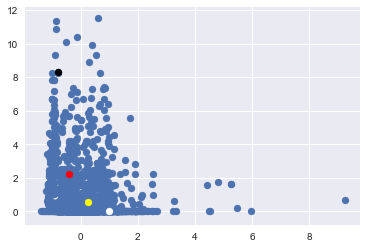

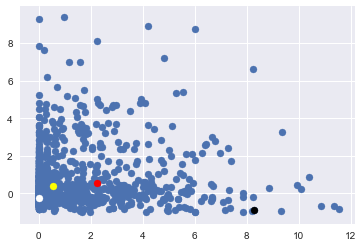

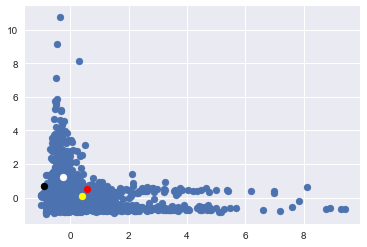

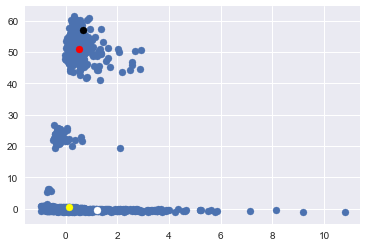

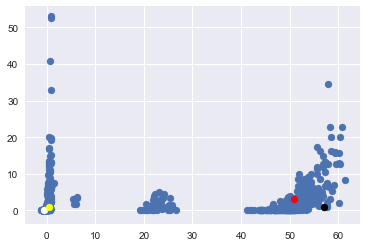

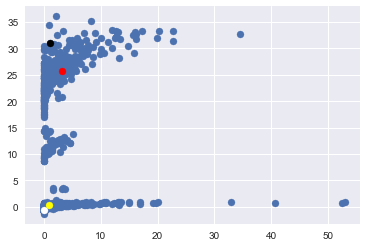

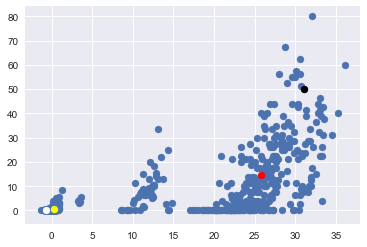

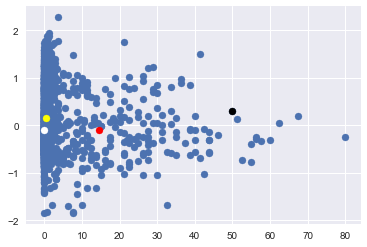

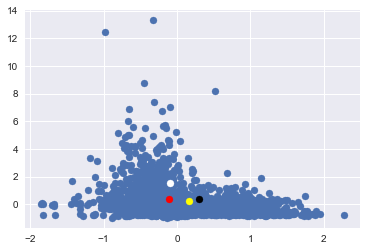

In [31]:
# scatter plot with centres and extreme points 
# extreme 1 is highest stress point
# extreme 2 is lowest stress point

for z in range(0,train.shape[1]-1):
    plt.scatter(train.values[:,z],train.values[:,z+1])
    #for a plot on top of scatter plot
    plt.scatter(extreme_1[z] ,extreme_1[z+1], color='white')
    plt.scatter(extreme_2[z] ,extreme_2[z+1], color='black')
    plt.scatter(centers[0][z] ,centers[0][z+1], color='yellow')
    plt.scatter(centers[1][z] ,centers[1][z+1], color='red')
    plt.show()

In [32]:
# scaling stress from both extreme points

# euclidean distance for each pbs with both 
for i in range(0, env_stresses.shape[0]):
    env_stresses.loc[i,'dist_from_max_heat_drought_stress'] = distance.euclidean(train.values[i],extreme_points[0])
    env_stresses.loc[i,'dist_from_min_heat_drought_stress']= distance.euclidean(train.values[i],extreme_points[1])
    

In [33]:
# Heat Stress 
env_stresses['heat_drought_stress_percent'] = env_stresses['dist_from_min_heat_drought_stress']/(env_stresses['dist_from_min_heat_drought_stress']+env_stresses['dist_from_max_heat_drought_stress'])

env_stresses['heat_drought_stress'] = env_stresses['heat_drought_stress_percent']*env_stresses['ENV_YIELD_MEAN']
env_stresses.head(5)

,ENV_ID,ENV_YIELD_MEAN,tavg,TMAX,TMIN,warmnights,hotdays,VP,ELEVATION,dayl_srad_tavg,...,labels_drought,dist_from_max_drought_stress,dist_from_min_drought_stress,drought_stress_percent,drought_stress,labels_heat_drought,dist_from_max_heat_drought_stress,dist_from_min_heat_drought_stress,heat_drought_stress_percent,heat_drought_stress
0,Env_1,101.429980,-1.489670,-1.403264,-1.452245,-0.3,0.0,-0.985256,-0.167960,-1.030405,...,1,0.000000,43.678966,1.000000,101.429980,0,3.098949,83.519657,0.964223,97.801125
1,Env_10,101.501334,-1.040721,-1.115524,-0.827368,-0.3,0.0,-0.370338,0.879997,-0.807158,...,1,1.765254,43.077433,0.960635,97.505686,0,0.000000,83.137701,1.000000,101.501334
2,Env_100,110.765224,-0.605769,-0.570125,-0.566422,-0.3,0.0,-0.823070,0.002190,-0.907785,...,1,1.644136,43.150053,0.963296,106.699673,0,1.593599,83.054086,0.981174,108.679929
3,Env_1000,129.809379,0.328534,0.546163,0.065497,-0.3,3.2,0.004337,2.956280,0.673974,...,0,40.312840,6.091429,0.131269,17.039912,1,63.519237,31.205147,0.329431,42.763231
4,Env_1001,125.598805,-0.560009,-0.351314,-0.747515,-0.3,1.6,0.205551,2.956113,0.483231,...,0,41.339483,4.446080,0.097107,12.196471,1,55.693973,42.402406,0.432253,54.290399


In [34]:
env_stresses['heat_drought_stress_v2']=(env_stresses['heat_stress']+0.1)*(env_stresses['drought_stress']+0.1)*(env_stresses['heat_drought_stress']+0.1)

In [35]:
env_stresses.to_csv('Objectve1.csv', index = False)